
Delivery_time -> Predict delivery time using sorting time

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
df=files.upload()
df=pd.read_csv("delivery_time.csv")

Saving delivery_time.csv to delivery_time.csv


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
df.shape

(21, 2)

In [4]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [ ]:
df["Delivery Time"]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [7]:
def log_transform(df):
  print(df)

In [ ]:
x=df["Delivery Time"]
x

In [ ]:
log_x=np.log(x)
print("Original Dataset:",x)
print("Log transformed dataset:",log_x)

In [ ]:
y=df["Sorting Time"]
y

In [ ]:
log_y=np.log(y)
print("Original Dataset:",y)
print("Log transformed dataset:",log_y)

<ipython-input-12-512327699426>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


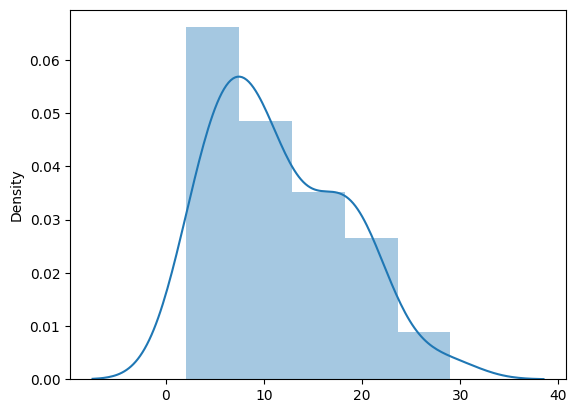

In [12]:
sns.distplot(df)
plt.show()

<ipython-input-13-d6481c165b9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_x)
<ipython-input-13-d6481c165b9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y)


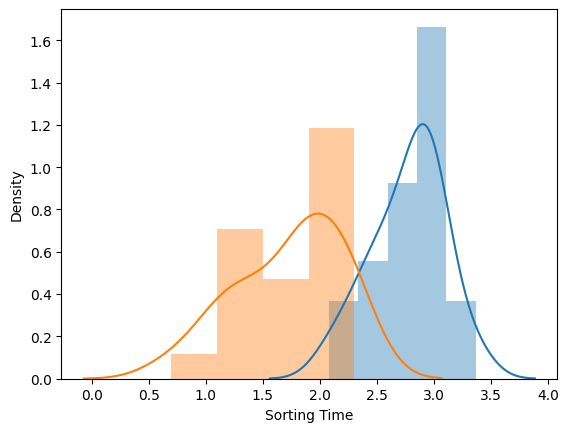

In [13]:
sns.distplot(log_x)
sns.distplot(log_y)
plt.show()

In [14]:
scaled_price = (log_x -np.mean(log_x))/np.sqrt(np.var(log_x))
scaled_price

0     0.868575
1    -0.554168
2     0.670961
3     1.298558
4     1.907935
5    -0.140625
6     0.546297
7    -1.685702
8     0.354256
9     0.503646
10    0.683978
11   -1.287653
12    0.126949
13   -1.070486
14   -0.925400
15   -0.240761
16   -0.495082
17    0.391814
18   -2.239076
19    0.341639
20    0.944345
Name: Delivery Time, dtype: float64

In [25]:
df['Delivery Time'].describe()

count    21.000000
mean     16.790952
std       5.074901
min       8.000000
25%      13.500000
50%      17.830000
75%      19.750000
max      29.000000
Name: Delivery Time, dtype: float64

In [26]:
df['Sorting Time'].describe()

count    21.000000
mean      6.190476
std       2.542028
min       2.000000
25%       4.000000
50%       6.000000
75%       8.000000
max      10.000000
Name: Sorting Time, dtype: float64

In [32]:
df[list]

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [35]:
array_A = np.array(df["Delivery Time"])
array_B = np.array(df["Sorting Time"])

print(array_A)
print(array_B)

[21.   13.5  19.75 24.   29.   15.35 19.    9.5  17.9  18.75 19.83 10.75
 16.68 11.5  12.03 14.88 13.75 18.11  8.   17.83 21.5 ]
[10  4  6  9 10  6  7  3 10  9  8  4  7  3  3  4  6  7  2  7  5]


<Axes: >

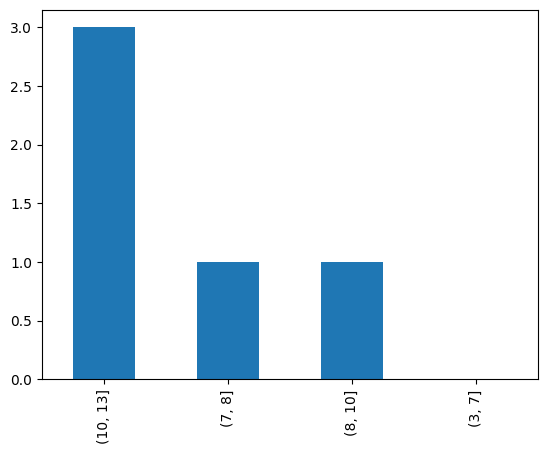

In [40]:
bins = [3,7,8,10,13]
bins_grade = pd.cut(df["Delivery Time"],bins)
bins_grade.value_counts().plot(kind='bar')

In [41]:
bins_grade = bins_grade.cat.as_unordered()
grade_dummy = pd.get_dummies(bins_grade, prefix="Delivery Time")

In [42]:
grade_dummy

,"Delivery Time_(3, 7]","Delivery Time_(7, 8]","Delivery Time_(8, 10]","Delivery Time_(10, 13]"
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,1,0
8,0,0,0,0
9,0,0,0,0


In [45]:
bins_grade = bins_grade.cat.as_unordered()
grade_dummy1 = pd.get_dummies(bins_grade, prefix="Sorting Time")

In [46]:
grade_dummy1

,"Sorting Time_(3, 7]","Sorting Time_(7, 8]","Sorting Time_(8, 10]","Sorting Time_(10, 13]"
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,1,0
8,0,0,0,0
9,0,0,0,0


In [49]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
grade_dummies1 = lb.fit_transform(df["Sorting Time"])
grade_dum_df = pd.DataFrame(grade_dummies1,columns=lb.classes_)
grade_dum_df

,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,1,0,0,0
7,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,1,0


Salary_hike -> Build a prediction model for Salary_hike

In [51]:
import pandas as pd
import numpy as np
from google.colab import files
df=files.upload()
df=pd.read_csv("Salary_Data.csv")

Saving Salary_Data.csv to Salary_Data.csv


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [53]:
df.shape

(30, 2)

In [54]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [56]:
def log_transform(df):
  print(df)

In [58]:
x=df["YearsExperience"]
y=df["Salary"]
print(x)
print(y)

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64
0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


In [59]:
log_x=np.log(x)
print("Original Dataset:",x)
print("Log transformed dataset:",log_x)

Original Dataset: 0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64
Log transformed dataset: 0     0.095310
1     0.262364
2     0.405465
3     0.693147
4     0.788457
5     1.064711
6     1.098612
7     1.163151
8     1.163151
9     1.308333
10    1.360977
11    1.386294
12    1.386294
13    1.410987
14    1.504077
15    1.589235
16    1.629241
17    1.667707
18    1.774952
19    1.791759
20    1.916923
21    1.960095
22    2.066863
23    2.104134
24    2.163323
25    2.197225
26    2.251292
27    2.261763
28    2.332144
29    2.351375
Name: YearsExperience, dtype: float64


In [60]:
log_y=np.log(y)
print("Original Dataset:",y)
print("Log transformed dataset:",log_y)

Original Dataset: 0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64
Log transformed dataset: 0     10.580073
1     10.740843
2     10.538237
3     10.681091
4     10.593906
5     10.944506
6     11.004597
7     10.904946
8     11.073567
9     10.954117
10    11.054344
11    10.929422
12    10.950052
13    10.952227
14    11.020447
15    11.126351
16    11.097849
17    11.327656
18    11.306676
19    11.450412
20    11.426692
21    11.495505
22    11.525861
23    11.642303
24    11.603049
25    11.567243
26    11.669664
27    11.631908
28    11.714976
29    11.71072

<ipython-input-62-d6481c165b9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_x)
<ipython-input-62-d6481c165b9a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y)


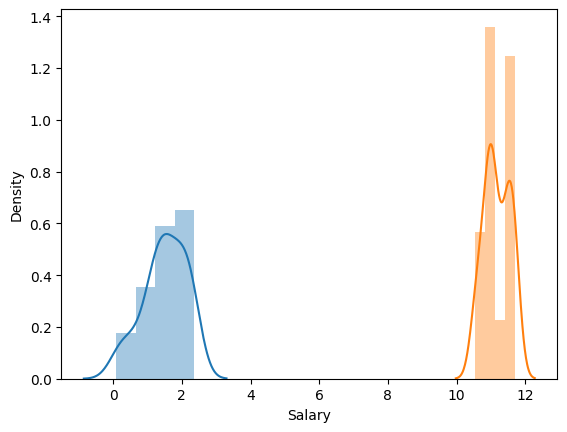

In [62]:
sns.distplot(log_x)
sns.distplot(log_y)
plt.show()

In [63]:
scaled_price = (log_x -np.mean(log_x))/np.sqrt(np.var(log_x))
scaled_price

0    -2.296847
1    -2.024657
2    -1.791495
3    -1.322760
4    -1.167466
5    -0.717352
6    -0.662114
7    -0.556958
8    -0.556958
9    -0.320405
10   -0.234630
11   -0.193379
12   -0.193379
13   -0.153146
14   -0.001469
15    0.137284
16    0.202466
17    0.265141
18    0.439882
19    0.467267
20    0.671202
21    0.741544
22    0.915507
23    0.976235
24    1.072675
25    1.127913
26    1.216007
27    1.233069
28    1.347744
29    1.379078
Name: YearsExperience, dtype: float64

In [64]:
scaled_price = (log_y -np.mean(log_x))/np.sqrt(np.var(log_y))
scaled_price

0     25.028634
1     25.472029
2     24.913252
3     25.307234
4     25.066783
5     26.033720
6     26.199447
7     25.924616
8     26.389664
9     26.060226
10    26.336648
11    25.992118
12    26.049015
13    26.055013
14    26.243162
15    26.535238
16    26.456633
17    27.090426
18    27.032565
19    27.428981
20    27.363563
21    27.553345
22    27.637067
23    27.958208
24    27.849948
25    27.751196
26    28.033668
27    27.929538
28    28.158636
29    28.146916
Name: Salary, dtype: float64

In [65]:
df['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [66]:
df["Salary"].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [69]:
array_A = np.array(df["YearsExperience"])
array_B = np.array(df["Salary"])
print("Years of Experience:",array_A)
print("Salary:",array_B)

Years of Experience: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Salary: [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


<Axes: >

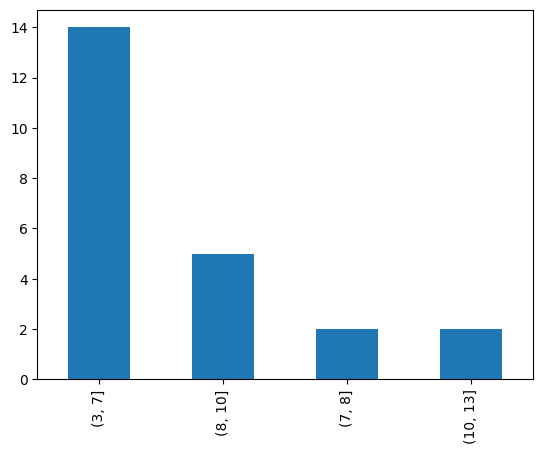

In [70]:
bins = [3,7,8,10,13]
bins_grade = pd.cut(df["YearsExperience"],bins)
bins_grade.value_counts().plot(kind='bar')

<Axes: >

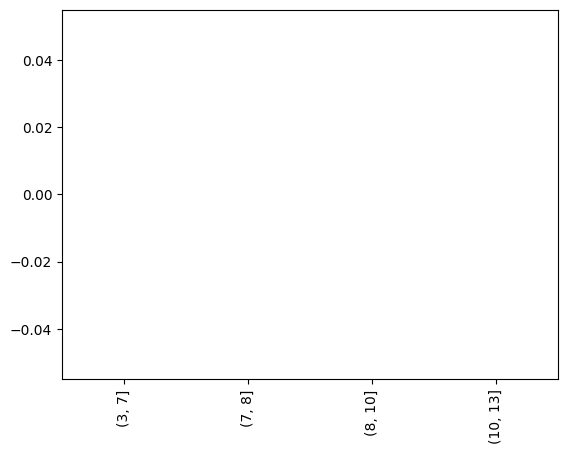

In [71]:
bins = [3,7,8,10,13]
bins_grade = pd.cut(df["Salary"],bins)
bins_grade.value_counts().plot(kind='bar')

In [73]:
bins_grade = bins_grade.cat.as_unordered()
grade_dummy = pd.get_dummies(bins_grade, prefix="YearsExperience")
grade_dummy

,"YearsExperience_(3, 7]","YearsExperience_(7, 8]","YearsExperience_(8, 10]","YearsExperience_(10, 13]"
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [77]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
grade_dummies = lb.fit_transform(df["YearsExperience"])
grade_dum_df = pd.DataFrame(grade_dummies,columns=lb.classes_)
grade_dum_df

ValueError: Unknown label type: (0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64,)

In [78]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
grade_dummies1 = lb.fit_transform(df["Salary"])
grade_dum_df = pd.DataFrame(grade_dummies1,columns=lb.classes_)
grade_dum_df

,37731.0,39343.0,39891.0,43525.0,46205.0,54445.0,55794.0,56642.0,56957.0,57081.0,...,93940.0,98273.0,101302.0,105582.0,109431.0,112635.0,113812.0,116969.0,121872.0,122391.0
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
